In [1]:
import matplotlib.pyplot as plt
import numpy as np

iris_data_location = '../Data/Iris/iris.data'

from snn_dpe import Encoder, Neuron, Synapse
from snn_dpe.tools.data import normalize_iris_data, read_iris_data
from snn_dpe.tools.network import (create_encoders, create_network,
                                   find_steady_state, reset_network,
                                   run_network, run_network_early_exit)
from snn_dpe.tools.plotting import *
from snn_dpe.tools.test import predict
from snn_dpe.tools.train import forward_pass, mse, train_all, update_weights

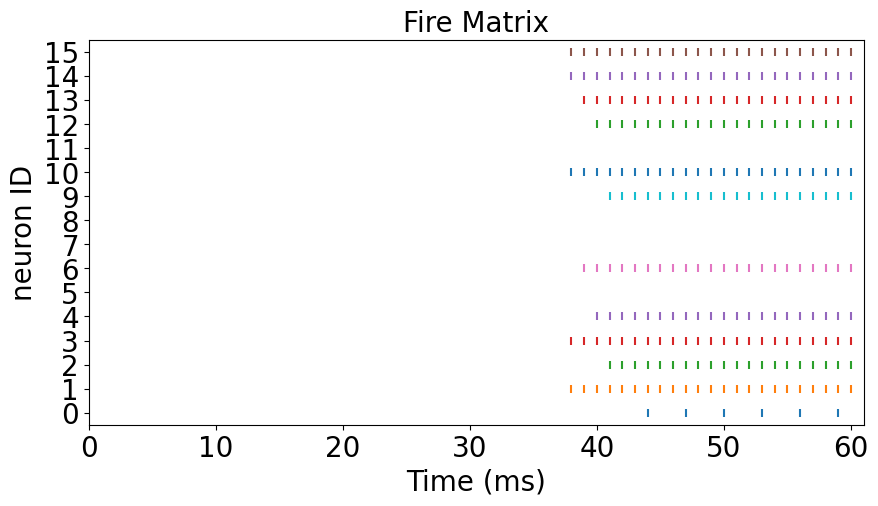

avg neuron fire rates (x):
neuron 15: 0.3770491803278688
neuron 14: 0.3770491803278688
neuron 13: 0.36065573770491804
neuron 12: 0.3442622950819672
neuron 11: 0.0
neuron 10: 0.3770491803278688
neuron 9: 0.32786885245901637
neuron 8: 0.0
neuron 7: 0.0
neuron 6: 0.36065573770491804
neuron 5: 0.0
neuron 4: 0.3442622950819672
neuron 3: 0.3770491803278688
neuron 2: 0.32786885245901637
neuron 1: 0.3770491803278688
neuron 0: 0.09836065573770492
(3,)
Mean Squared Error 0 = 42269.604698463125


ValueError: setting an array element with a sequence.

In [2]:
iris_data, labels, classes, attributes = read_iris_data(iris_data_location)

normalized_iris_data = normalize_iris_data(iris_data, attributes)

test_idx = 0
normalized_iris_data_sample = normalized_iris_data[test_idx]
label = labels[test_idx]

# create a test network and encoders
n_neurons = 16
n_synapses = int(n_neurons * np.random.uniform(low=2, high=3)) # random number from n_neurons * 2 to n_neurons * 3

neurons = create_network(n_neurons, n_synapses)

encoders = create_encoders(len(attributes))

dpe_weights = np.random.rand(n_neurons, len(classes))

sim_time = 200

# show we can reduce error for a singe test sample
for i in range(10):
    # feed a test sample into the test network
    fire_matrix = run_network_early_exit(neurons, encoders, normalized_iris_data_sample, sim_time)
    plot_fire_matrix(fire_matrix)
    reset_network(neurons, encoders)

    x, y = forward_pass(fire_matrix, dpe_weights)
    print(y.shape)

    y_hat = np.zeros(len(classes))
    y_hat[label] = 1

    print(f'Mean Squared Error {i} = {mse(y, y_hat)}')

    update_weights(fire_matrix, dpe_weights, x, y, y_hat)